In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/aleksandr/Desktop/Lecture 9 - Prediction/Example3.csv')

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df = df[df['TotalCharges'] != " "]  

In [6]:
df['OnlineSecurity']= df['OnlineSecurity'].replace('No internet service', 'No').astype('category')

df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No').astype('category')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No').astype('category')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No').astype('category')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No').astype('category')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No').astype('category')
df["MultipleLines"] = df['MultipleLines'].replace("No phone service", "No" ).astype('category')



In [7]:
def recode(tenure):
    if (tenure >= 0) & (tenure <=12):
        return '0-12 Month'
    elif (tenure > 12) & (tenure <= 24):
        return '12-24 Month'
    elif (tenure > 24) & (tenure <= 48):
        return '24-48 Month'
    elif (tenure > 48) & (tenure <=60):
        return '48-60 Month'
    elif (tenure > 60):
        return '60 Month'
        

In [8]:
df['tenure']= df['tenure'].apply(recode).astype('category')
df['SeniorCitizen']  = df['SeniorCitizen'].replace(0, 'No')
df['SeniorCitizen']  = df['SeniorCitizen'].replace(1, 'Yes')
df['SeniorCitizen']  = df['SeniorCitizen'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')

In [9]:
df['gender'] = df['gender'].astype('category')
df['Partner'] = df['Partner'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['PhoneService'] = df['PhoneService'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')
df['Contract'] = df['Contract'].astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['Churn'] = df['Churn'].astype('category')

In [10]:
df['TotalServices'] = (df[['PhoneService', 'InternetService',
'OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
coder = LabelEncoder()
for i in [e for e in df.columns if len(df[e].unique())==2]:
    df[i] = coder.fit_transform(df[i])

In [13]:
pd.options.display.max_columns = 50

In [14]:
df=pd.get_dummies(df, columns=['tenure', 'InternetService', 'Contract', 'PaymentMethod' ],drop_first=True)

In [15]:
df['Churn']  = df['Churn'].replace('No', 0)
df['Churn'] = df['Churn'].replace('Yes', 1)

In [16]:
df = df.drop(['customerID'], axis = 1)

In [17]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalServices,tenure_12-24 Month,tenure_24-48 Month,tenure_48-60 Month,tenure_60 Month,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,3,0,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,1,1,0,0,0,0,1,53.85,108.15,1,3,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,3,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,1,1,0,0,1,0,1,1,1,99.65,820.50,1,4,0,0,0,0,1,0,0,0,0,1,0
6,1,0,0,1,1,1,0,1,0,0,1,0,1,89.10,1949.40,0,3,1,0,0,0,1,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,29.75,301.90,0,1,0,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,5,0,1,0,0,1,0,0,0,0,1,0
9,1,0,0,1,1,0,1,1,0,0,0,0,0,56.15,3487.95,0,3,0,0,0,1,0,0,1,0,0,0,0


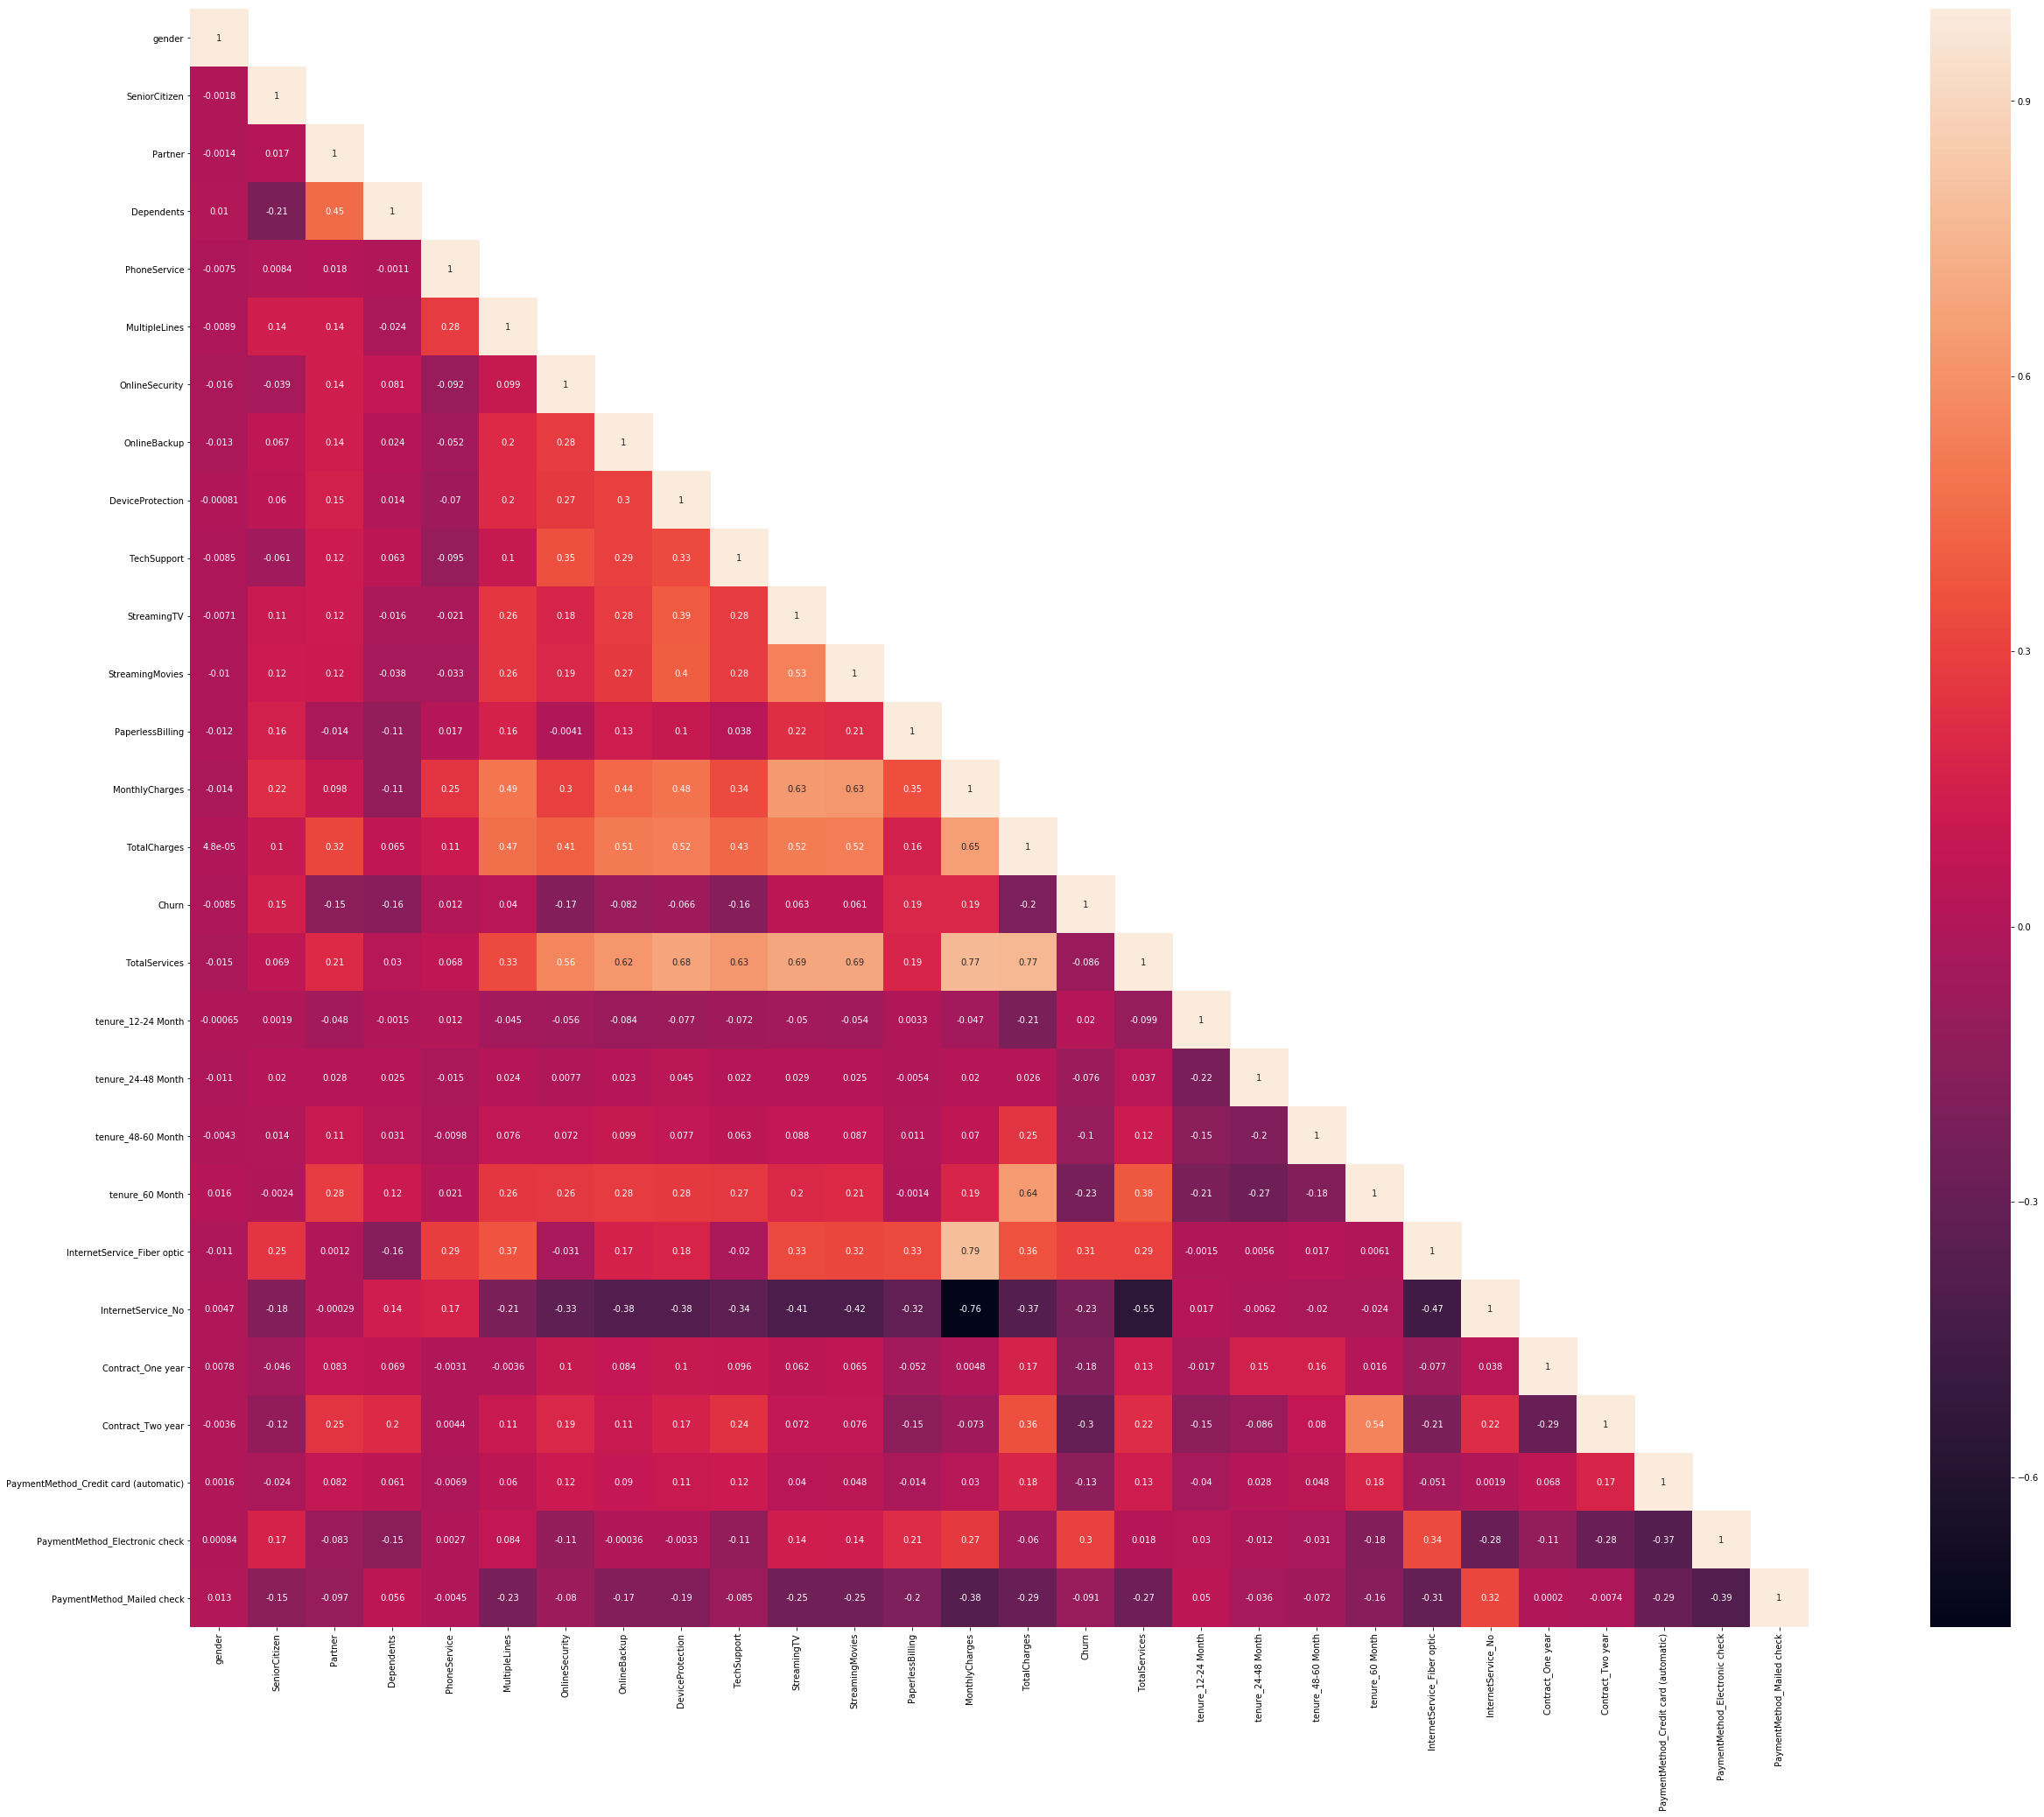

In [23]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(50,34)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [25]:
corr = df.corr('spearman')
corr2 = df.corr('spearman')

In [26]:
corrdf = pd.DataFrame(corr)

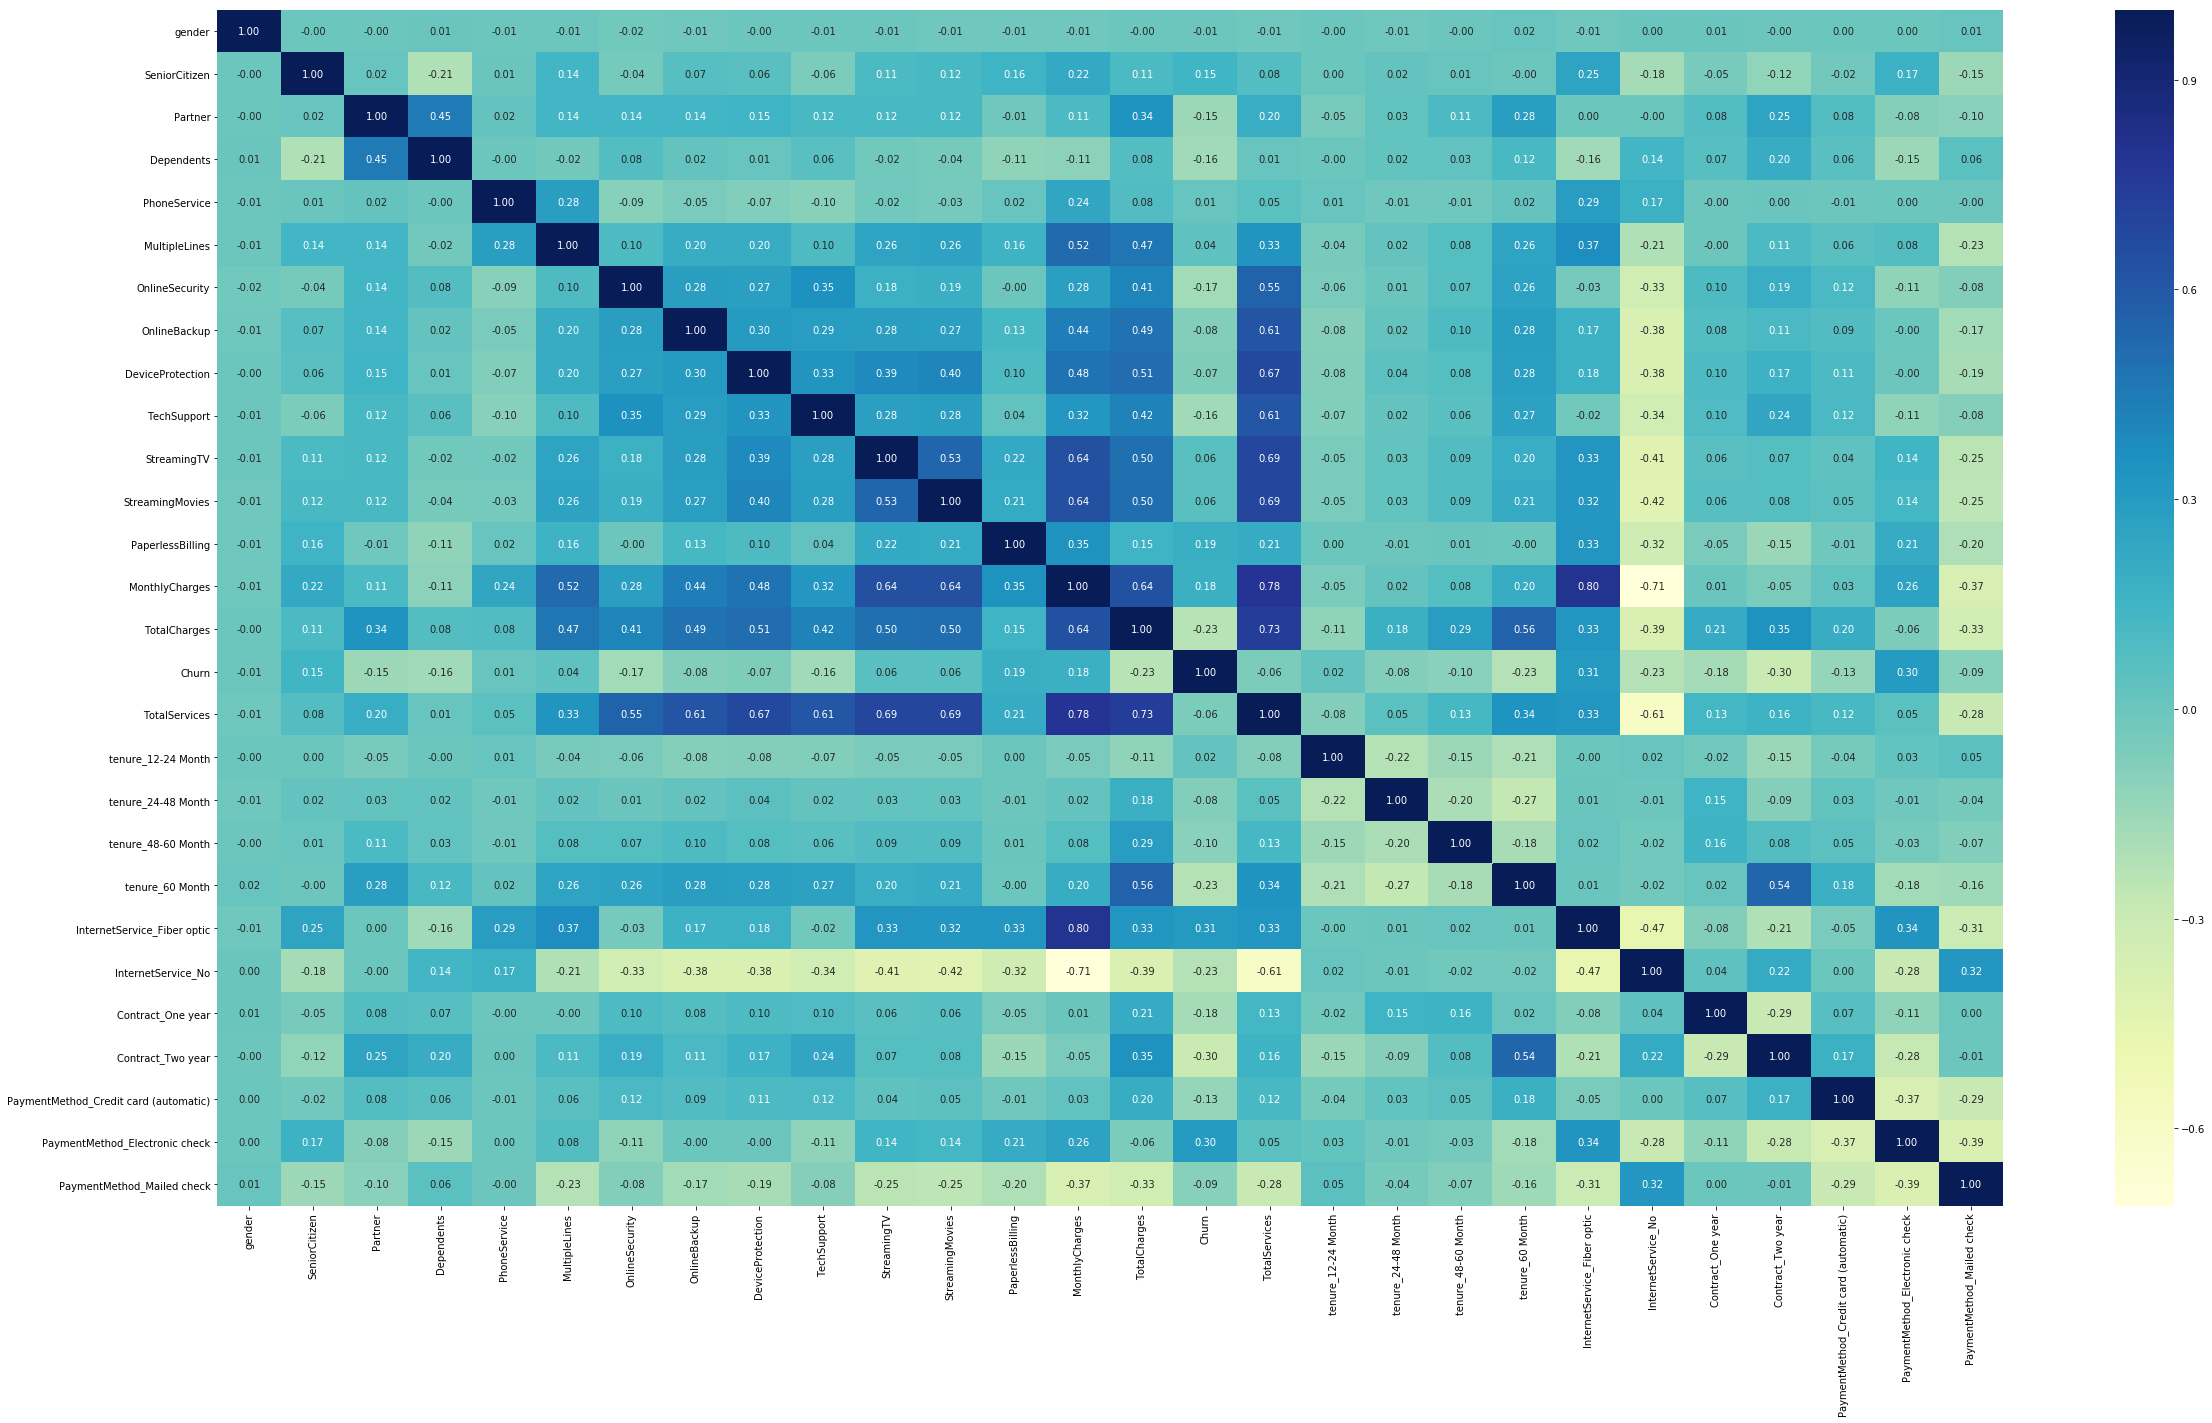

In [27]:
plt.figure(figsize = ( 40 , 22 )) 
sns.heatmap(corr2,annot=True,fmt='.2f',cmap="YlGnBu");

In [17]:
from sklearn.utils import resample
df_0 = df[df.Churn==0]
df_1 = df[df.Churn==1]
df_new = resample(df_1,
replace=True,
n_samples=5000,
random_state=42)
data = pd.concat([df_0, df_new])

In [18]:
y = data['Churn']

In [19]:
data = data.drop(['Churn'], axis =1)

In [20]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
data, y, test_size=0.15, random_state=17)

In [22]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

predictions = forest.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

accuracy

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9068852459016393

In [24]:
forest_params = {'max_depth': range(1,20),
'max_features': range(4,20)}

forest_grid = GridSearchCV(forest, forest_params,
                        cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ 


accuracy_score(y_test, forest_grid.predict(X_test))

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 921 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1271 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  1.5min finished


0.9016393442622951

## Trash code for dataset exploration and testing 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [70]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [71]:
logit = LogisticRegression(n_jobs=-1, random_state=42)

In [72]:
logit.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=42, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
logit.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1])

In [74]:
predictions = logit.predict(X_test)

In [75]:
score = logit.score(X_test, y_test)
print(score)

0.7520498524106264


In [76]:
weights = logit.coef_
abs_weights = np.abs(weights)
print(abs_weights)

[[1.32638559e-03 2.45168586e-01 7.10657931e-03 7.91482489e-02
  6.40374248e-01 1.69601612e-01 2.67770447e-01 1.25403486e-01
  1.54272752e-01 1.73948080e-01 2.54339417e-01 3.04128782e-01
  3.28281165e-01 2.44597615e-02 1.42508137e-04 2.43948338e-01
  7.31693412e-01 1.05418264e+00 8.38913286e-01 8.60573479e-01
  2.68807556e-01 3.37812915e-01 8.06541637e-01 1.83475992e+00
  1.48993612e-01 3.32471858e-01 6.07354020e-03]]


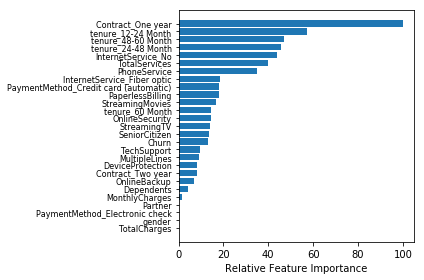

In [77]:
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1,1 , 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

'TotalCharges', 'gender', 'PaymentMetod_Electronic check',  'MonthlyCharges'

In [78]:
from sklearn import tree

In [79]:
clf = tree.DecisionTreeClassifier()

In [80]:
clf = clf.fit(X_train, y_train)

In [81]:
clf.feature_importances_

array([0.02148277, 0.02169795, 0.02081353, 0.01356192, 0.00453376,
       0.01333522, 0.01393677, 0.01190042, 0.01279698, 0.01314327,
       0.00798917, 0.02146855, 0.0182476 , 0.18621494, 0.24604391,
       0.02257052, 0.00067811, 0.00590374, 0.0026983 , 0.00297157,
       0.03939474, 0.01918826, 0.08952866, 0.14484144, 0.01130703,
       0.02084346, 0.01290741])

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 14 (0.219005)
2. feature 13 (0.174172)
3. feature 23 (0.055751)
4. feature 20 (0.050818)
5. feature 15 (0.041476)
6. feature 25 (0.041427)
7. feature 22 (0.032913)
8. feature 21 (0.030812)
9. feature 0 (0.027991)
10. feature 12 (0.027913)
11. feature 19 (0.027306)
12. feature 6 (0.025665)
13. feature 2 (0.022810)
14. feature 9 (0.022558)
15. feature 3 (0.020726)
16. feature 5 (0.020348)
17. feature 1 (0.020035)
18. feature 7 (0.019065)
19. feature 11 (0.016347)
20. feature 8 (0.016334)
21. feature 17 (0.015516)
22. feature 24 (0.015409)
23. feature 10 (0.015108)
24. feature 26 (0.012403)
25. feature 16 (0.012061)
26. feature 18 (0.008829)
27. feature 4 (0.007203)


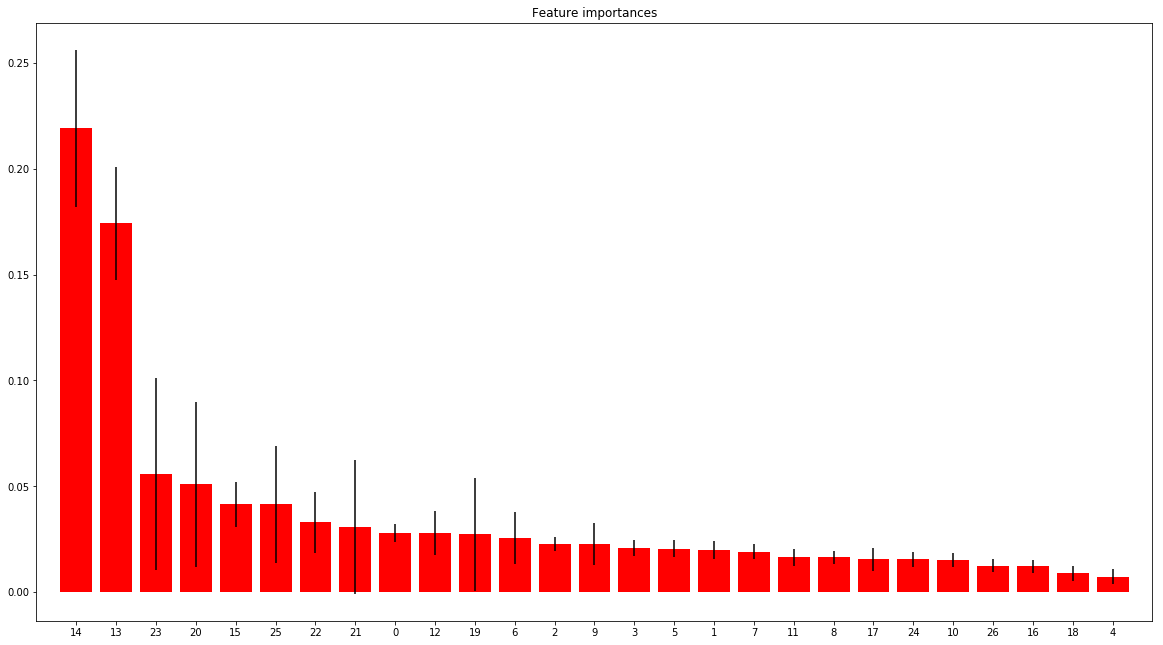

In [82]:
print(__doc__)


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = ( 20 , 11 ))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [83]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [84]:
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [85]:


tree_pred = tree.predict(X_test)

In [86]:


accuracy_score(y_test, tree_pred)

0.7550016398819285

In [87]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.7369629386684159

In [88]:


tree_params = {'max_depth': range(1,20),
               'max_features': range(4,20)}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 602 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'max_features': range(4, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [89]:
tree_grid.best_params_

{'max_depth': 19, 'max_features': 15}

In [90]:
tree_grid.best_score_

0.8379252178802361

In [91]:

accuracy_score(y_test, tree_grid.predict(X_test))

0.8497868153492949

In [45]:


knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 30)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:  2.3min finished
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


({'knn__n_neighbors': 1}, 0.8235872926623559)

In [46]:
accuracy_score(y_test, knn_grid.predict(X_test))

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8615939652345032

In [92]:


forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.867861599308718


In [48]:
forest_params = {'max_depth': range(1,20),
'max_features': range(4,20)}

forest_grid = GridSearchCV(forest, forest_params,
                        cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ 

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  9.7min finished


({'max_depth': 19, 'max_features': 7}, 0.8663199325274107)

In [49]:

accuracy_score(y_test, forest_grid.predict(X_test))

0.8852082650049197

Feature ranking:
1. feature 14 (0.219005)
2. feature 13 (0.174172)
3. feature 23 (0.055751)
4. feature 20 (0.050818)
5. feature 15 (0.041476)
6. feature 25 (0.041427)
7. feature 22 (0.032913)
8. feature 21 (0.030812)
9. feature 0 (0.027991)
10. feature 12 (0.027913)
11. feature 19 (0.027306)
12. feature 6 (0.025665)
13. feature 2 (0.022810)
14. feature 9 (0.022558)
15. feature 3 (0.020726)
16. feature 5 (0.020348)
17. feature 1 (0.020035)
18. feature 7 (0.019065)
19. feature 11 (0.016347)
20. feature 8 (0.016334)
21. feature 17 (0.015516)
22. feature 24 (0.015409)
23. feature 10 (0.015108)
24. feature 26 (0.012403)
25. feature 16 (0.012061)
26. feature 18 (0.008829)
27. feature 4 (0.007203)


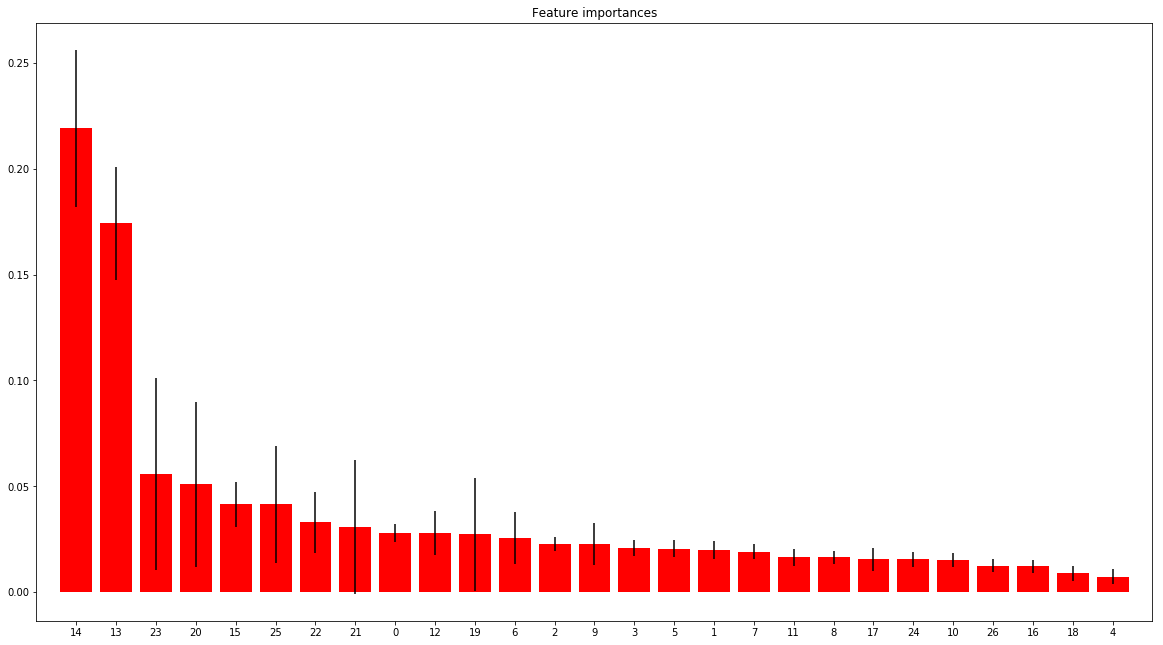

In [54]:


forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = ( 20 , 11 ))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [37]:
data.iloc[:, [4]]

,PhoneService,tenure_48-60 Month
0,0,0
1,1,0
3,0,0
6,1,0
7,0,0
9,1,0
10,1,0
11,1,0
12,1,1
14,1,0


In [55]:
data= data.drop(['PhoneService'],  axis =1)

In [56]:
X_train, X_test = train_test_split(
data,  test_size=0.30, random_state=17)

In [57]:


forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

forest_params = {'max_depth': range(1,20),
'max_features': range(4,20)}

forest_grid = GridSearchCV(forest, forest_params,
                        cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ 


accuracy_score(y_test, forest_grid.predict(X_test))

0.8703910708510294
Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  9.6min finished


0.8904558871761233

Feature ranking:
1. feature 13 (0.218282)
2. feature 12 (0.175544)
3. feature 22 (0.068694)
4. feature 19 (0.049467)
5. feature 24 (0.046210)
6. feature 14 (0.042288)
7. feature 21 (0.033780)
8. feature 0 (0.028173)
9. feature 11 (0.027095)
10. feature 20 (0.027042)
11. feature 5 (0.023968)
12. feature 2 (0.023281)
13. feature 8 (0.021975)
14. feature 18 (0.021748)
15. feature 3 (0.020043)
16. feature 1 (0.019882)
17. feature 4 (0.019587)
18. feature 6 (0.019260)
19. feature 7 (0.017230)
20. feature 16 (0.016017)
21. feature 10 (0.015818)
22. feature 9 (0.015699)
23. feature 23 (0.014888)
24. feature 25 (0.012647)
25. feature 15 (0.011945)
26. feature 17 (0.009438)


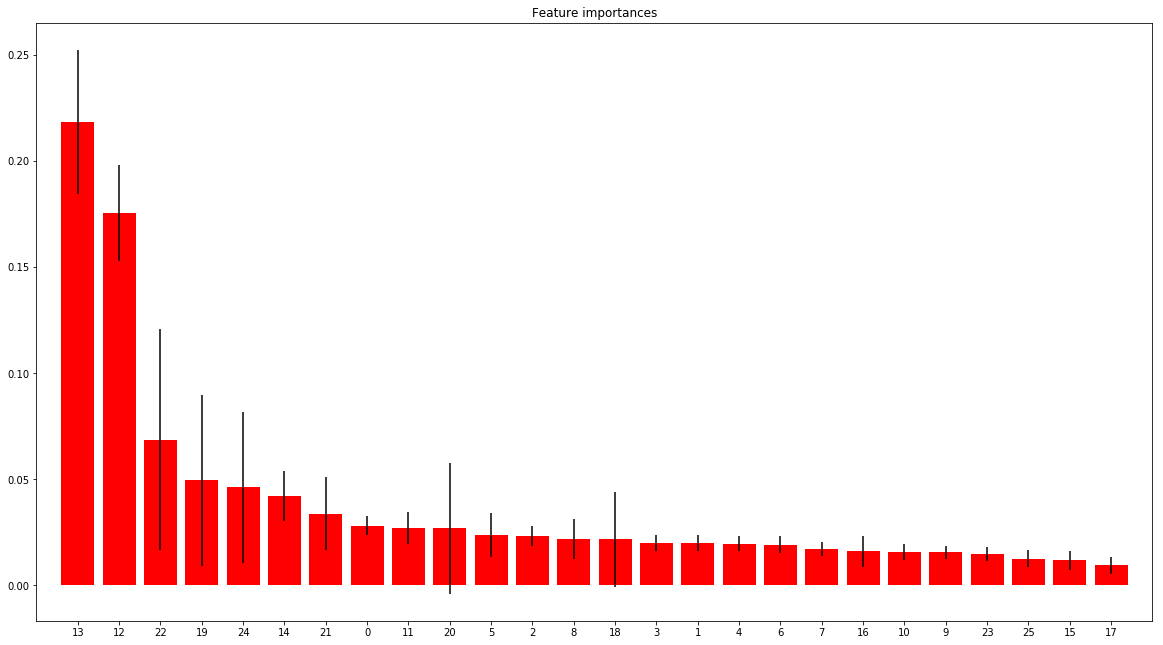

In [58]:


forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = ( 20 , 11 ))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [61]:
data.iloc[:, [17]]


,tenure_48-60 Month
0,0
1,0
3,0
6,0
7,0
9,0
10,0
11,0
12,1
14,0


In [62]:
data= data.drop(['tenure_48-60 Month'],  axis =1)

In [66]:


X_train, X_test = train_test_split(
data,  test_size=0.30, random_state=17)

In [67]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.8651910846039975


In [93]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [94]:
predictions = forest.predict(X_test)

In [95]:
accuracy = accuracy_score(y_test, predictions)

In [96]:
accuracy

0.8829124303050181

Feature ranking:
1. feature 14 (0.216150)
2. feature 13 (0.170045)
3. feature 20 (0.056708)
4. feature 23 (0.051721)
5. feature 25 (0.042854)
6. feature 19 (0.041226)
7. feature 15 (0.034931)
8. feature 21 (0.032307)
9. feature 0 (0.028004)
10. feature 22 (0.026616)
11. feature 2 (0.024631)
12. feature 12 (0.024561)
13. feature 6 (0.024237)
14. feature 1 (0.022866)
15. feature 7 (0.021150)
16. feature 3 (0.020173)
17. feature 5 (0.019539)
18. feature 9 (0.018094)
19. feature 8 (0.017029)
20. feature 10 (0.016615)
21. feature 16 (0.016076)
22. feature 17 (0.015684)
23. feature 24 (0.015432)
24. feature 11 (0.015423)
25. feature 26 (0.012092)
26. feature 18 (0.008518)
27. feature 4 (0.007317)


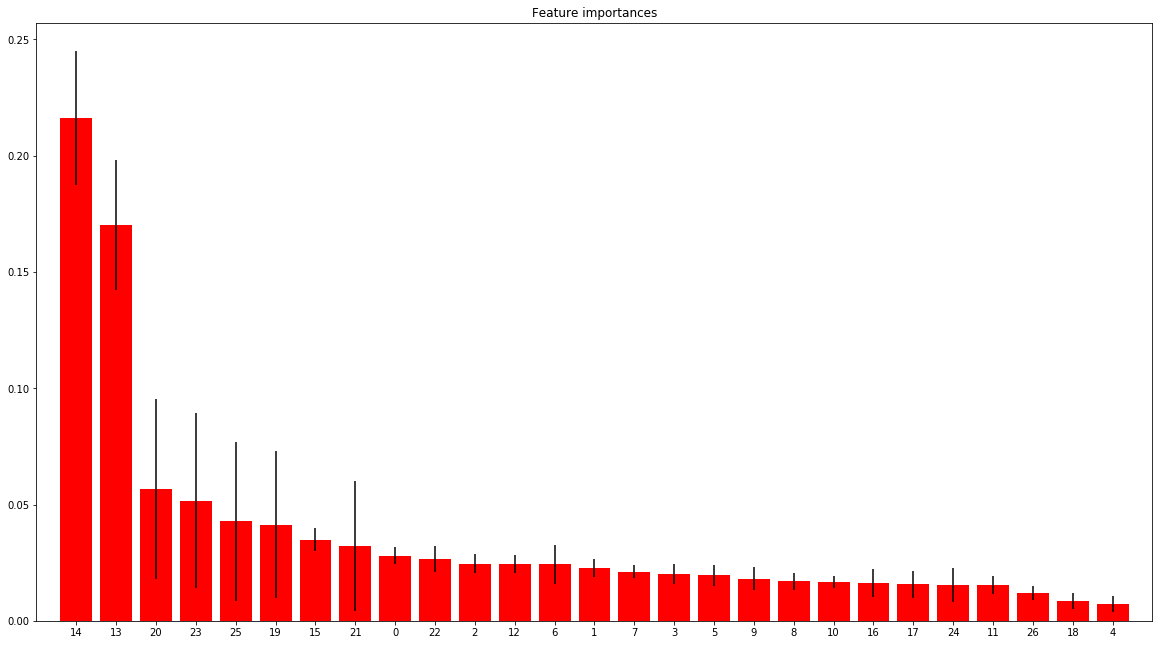

In [118]:


importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = ( 20 , 11 ))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [120]:
data.iloc[:, [4, 18]]

,PhoneService,tenure_48-60 Month
0,0,0
1,1,0
3,0,0
6,1,0
7,0,0
9,1,0
10,1,0
11,1,0
12,1,1
14,1,0
